In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

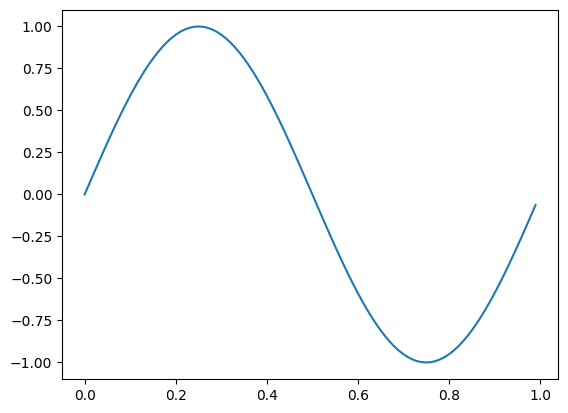

In [2]:
X = np.arange(0,1,0.01)
y = np.sin(2*np.pi*X)

X = X.reshape(X.shape[0],1)
y = y.reshape(y.shape[0],1)

X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float()

plt.plot(X_tensor,y_tensor)

In [3]:
class Regression(nn.Module):
    
    def __init__(self):
        super(Regression,self).__init__()
        self.layer = nn.Sequential(
            nn.Linear(1,256),
            nn.Sigmoid(),
            nn.Linear(256,128),
            nn.Sigmoid(),
            nn.Linear(128,100),
            nn.Sigmoid(),
            nn.Linear(100,1)
        )
        
    def forward(self,x):
        y_pred = self.layer(x)
        return y_pred
model = Regression()
print(model)

Regression(
  (layer): Sequential(
    (0): Linear(in_features=1, out_features=256, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=128, out_features=100, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=100, out_features=1, bias=True)
  )
)


In [4]:
epochs = 1000
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)
running_loss = []

In [5]:
model.train()
for epoch in range(epochs):
    loss = 0.0
    output = model(X_tensor)
    loss = criterion(output,y_tensor)
    running_loss.append(loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch%10 == 0:
        print(f'Epoch:{epoch}, Loss:{loss}')


Epoch:0, Loss:0.5977644920349121
Epoch:10, Loss:0.568084180355072
Epoch:20, Loss:0.5557289719581604
Epoch:30, Loss:0.5106121301651001
Epoch:40, Loss:0.4973021447658539
Epoch:50, Loss:0.4902159571647644
Epoch:60, Loss:0.4422004818916321
Epoch:70, Loss:0.2656243145465851
Epoch:80, Loss:0.08810210973024368
Epoch:90, Loss:0.09169735014438629
Epoch:100, Loss:0.06848514825105667
Epoch:110, Loss:0.06797200441360474
Epoch:120, Loss:0.06501992046833038
Epoch:130, Loss:0.0644070953130722
Epoch:140, Loss:0.06402900815010071
Epoch:150, Loss:0.06376183778047562
Epoch:160, Loss:0.06365515291690826
Epoch:170, Loss:0.06356263905763626
Epoch:180, Loss:0.06349852681159973
Epoch:190, Loss:0.06343290954828262
Epoch:200, Loss:0.0633695051074028
Epoch:210, Loss:0.06330457329750061
Epoch:220, Loss:0.06323389708995819
Epoch:230, Loss:0.06316182017326355
Epoch:240, Loss:0.06309002637863159
Epoch:250, Loss:0.06301730871200562
Epoch:260, Loss:0.06294441968202591
Epoch:270, Loss:0.06287127733230591
Epoch:280, Los

In [6]:
model.eval()
with torch.no_grad():
    output = model(X_tensor)
    loss = criterion(output,loss)
    
    print(f'Loss:{loss}')

Loss:0.4990297257900238


/Users/williamtiger/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


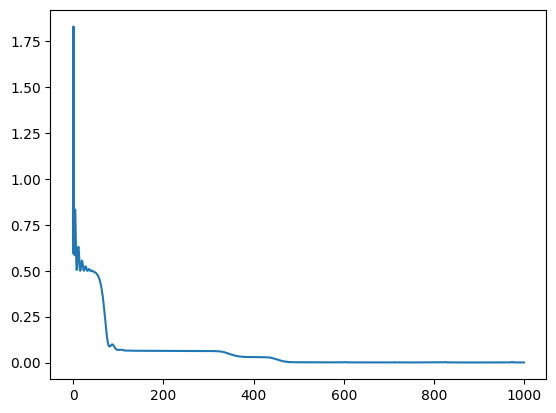

In [7]:
plt.plot([loss.detach() for loss in running_loss])

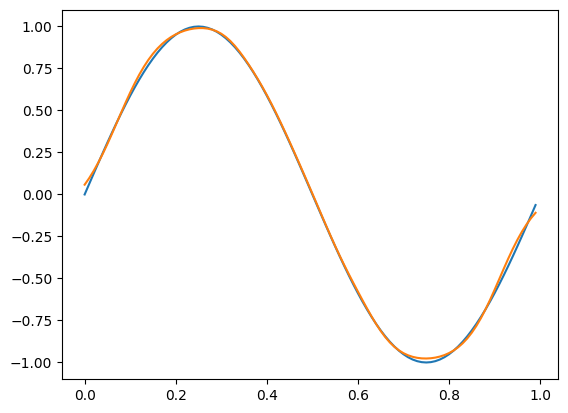

In [8]:
plt.plot(X_tensor,y_tensor)
plt.plot(X_tensor,output)

In [13]:
model(torch.tensor([0.5])).item()

0.005290091037750244